In [30]:
import numpy as np
from numpy.lib.function_base import interp
from numpy.linalg import multi_dot

In [4]:
qubit0 = np.array([[1],[0]])
qubit1 = np.array([[0], [1]])

In [5]:
qubit0

array([[1],
       [0]])

In [6]:
qudit0 = np.kron(qubit0, qubit0)
qudit1 = np.kron(qubit0, qubit1)
qudit2 = np.kron(qubit1, qubit0)

In [7]:
qubitStan0x0 = np.kron(qubit0, qubit0.conjugate().T)
qubitStan1x1 = np.kron(qubit1, qubit1.conjugate().T)

In [8]:
stan0x0 = np.kron(qudit0, qudit0.conj().T)
stan1x1 = np.kron(qudit1, qudit1.conj().T)
stan2x2 = np.kron(qudit2, qudit2.conj().T)

In [9]:
stan0x0

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [10]:
qubitStan0x0

array([[1, 0],
       [0, 0]])

In [11]:
qubitStan1x1

array([[0, 0],
       [0, 1]])

In [26]:
import itertools

def PhaseGate(sign):
    P = np.array([[1, 0], [0, sign*np.exp(2*1j*np.pi/3)]])
    return P
    
def CZgate(control, track, sign):
    final = []
    
    P = PhaseGate(sign)
    I = np.identity(2)
    
    temp = itertools.product([qubitStan0x0, qubitStan1x1], repeat=5)
    
    for i in temp:
        lst = [0] * 6
        indexes = list([i for i in range(6) if i != track])
        for idx, val in zip(indexes, i):
            lst[idx] = val
        if np.array_equal(lst[control], qubitStan1x1):
            lst[track] = P
        else:
            lst[track] = I
        final.append(lst)
    sumbig = []
    for i in final:
        sum = i[0]
        for j in i:
            sum = np.kron(sum, j)
        sumbig.append(sum)  
    finalMatrix = np.empty((128,128), dtype=complex)    
    for elem in sumbig:
        finalMatrix += elem
    return finalMatrix

In [27]:
test = CZgate(3, 4, 1)

In [59]:
len(test)

32

In [31]:
CZqudit01 = multi_dot([CZgate(0, 2, 1), CZgate(0, 3, -1), CZgate(1, 3, 1), CZgate(1, 2, -1)])
CZqudit02 = multi_dot([CZgate(0, 4, 1), CZgate(0, 5, -1), CZgate(1, 5, 1), CZgate(1, 4, -1)])
CZqudit12 = multi_dot([CZgate(2, 4, 1), CZgate(2, 5, -1), CZgate(3, 5, 1), CZgate(3, 4, -1)])

CZgates = multi_dot([CZqudit01, CZqudit02, CZqudit12])

In [33]:
CZgates.round(3)

array([[ 1.00000e+00+0.0000000e+00j,  0.00000e+00+0.0000000e+00j,
         0.00000e+00+0.0000000e+00j, ...,  0.00000e+00+0.0000000e+00j,
         0.00000e+00+0.0000000e+00j,  0.00000e+00+0.0000000e+00j],
       [ 0.00000e+00+0.0000000e+00j,  1.00000e+00+0.0000000e+00j,
         0.00000e+00+0.0000000e+00j, ...,  0.00000e+00+0.0000000e+00j,
         0.00000e+00+0.0000000e+00j,  0.00000e+00+0.0000000e+00j],
       [ 0.00000e+00+0.0000000e+00j,  0.00000e+00+0.0000000e+00j,
         1.00000e+00+0.0000000e+00j, ...,  0.00000e+00+0.0000000e+00j,
         0.00000e+00+0.0000000e+00j,  0.00000e+00+0.0000000e+00j],
       ...,
       [ 1.28295e+04-2.5818815e+04j, -5.90000e+01+3.1177000e+01j,
        -7.02000e+02-8.3138000e+01j, ...,  3.68500e+02-8.0107300e+02j,
        -2.14750e+03-7.3352400e+02j, -5.21500e+02-6.9368600e+02j],
       [ 4.97000e+02+8.5736500e+02j,  1.00000e+00-1.7320000e+00j,
         4.05000e+01-8.6600000e-01j, ...,  1.75000e+01+2.6847000e+01j,
         8.70000e+01-3.1177000e+01j

In [35]:
multi_dot([CZgates, CZgates.conj().T]).round(2)

array([[ 1.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.28295000e+04+2.58188200e+04j,  4.97000000e+02-8.57370000e+02j,
         2.88135000e+04-1.72252000e+03j],
       [ 0.00000000e+00+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
        -5.90000000e+01-3.11800000e+01j,  1.00000000e+00+1.73000000e+00j,
        -2.50000000e+00+6.66800000e+01j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j, ...,
        -7.02000000e+02+8.31400000e+01j,  4.05000000e+01+8.70000000e-01j,
         1.38350000e+03+1.46791000e+03j],
       ...,
       [ 1.28295000e+04-2.58188200e+04j, -5.90000000e+01+3.11800000e+01j,
        -7.02000000e+02-8.31400000e+01j, ...,
         9.26392818e+08-0.00000000e+00j, -1.88219390e+07-2.49112450e+07j,
         2.43691120e+08-8.73088998e+08j],
       [ 4.97000000e+02+8.57370000e+02j,  1.

In [38]:
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

def narysuj_macierz_zespolona(A):
    modul = np.abs(A)
    faza = np.angle(A)
    modul_norm = modul / np.max(modul)
    faza_norm = (faza + np.pi) / (2 * np.pi)
    HSV = np.zeros((*A.shape, 3))
    HSV[..., 0] = faza_norm
    HSV[..., 1] = 1
    HSV[..., 2] = modul_norm
    RGB = hsv_to_rgb(HSV)
    plt.imshow(RGB)
    plt.axis('off')
    plt.show()

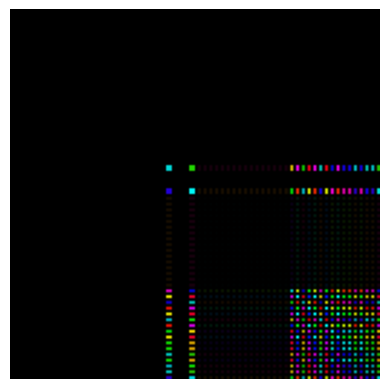

In [39]:
narysuj_macierz_zespolona(multi_dot([CZgates, CZgates.conj().T]).round(2))

In [41]:
import qiskit.circuit.library
from qiskit import QuantumCircuit
import numpy as np
from qiskit.quantum_info import Statevector

circ =QuantumCircuit(2) 
omega = 2*np.pi/3

circ.cp(omega, 0, 1)
circ.draw()

q_0: ─■────────
      │P(2π/3) 
q_1: ─■────────

In [42]:
def CZqutrit():
    circ = QuantumCircuit(4)
    omega = 2*np.pi/3
    circ.cp(omega, 0, 2)
    circ.cp(omega, 1, 3)
    circ.cp(-1 * omega, 0, 2)
    circ.cp(-1 * omega, 1, 3)
    
    return circ

In [43]:
czcirc = CZqutrit()

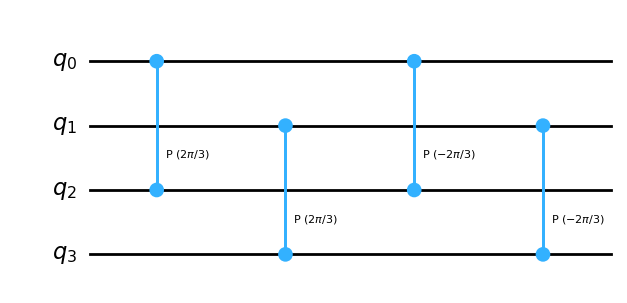

In [44]:
czcirc.draw('mpl')

In [45]:
vec = Statevector(czcirc)

In [46]:
vec.draw('latex')

<IPython.core.display.Latex object>

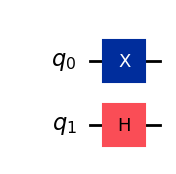

In [47]:
test = QuantumCircuit(2)
test.x(0)
test.h(1)
test.draw('mpl')

In [48]:
Statevector(test).draw('latex')

<IPython.core.display.Latex object>